# Sueprvised learning with scikit-learn for text data

scikit-learn can also be used for the text data. In addition to typical flags we also need to import

from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer turn the sentences to the bag of words similar to Gensim corpus and also remove English stop words  as a preprocessing step.



# scikit-learn plus Naive Bayes classifier
This method is commonly used for NPL classification problems because it deals with the probabilities. 

Related flag:

from sklearn.naive_bayes import MultinomialNB

Multinomial Naive Bayes method work very well with countvectorizers as it expects integers inputs. MultinomialNB is also used for multiple label classification. This model may not work with floats such as tfidf weighted inputs. Instead use support vector machines or even linear models although it is recommened to test in advanced.



In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("Newsarticles/IMDB_sample.csv")

In [92]:
# Print the head of df
print(df.head())


   Unnamed: 0                                             review  label
0       18245  This short spoof can be found on Elite's Mille...      0
1       19801  A singularly unfunny musical comedy that artif...      0
2        3222  An excellent series, masterfully acted and dir...      1
3        6010  The master of movie spectacle Cecil B. De Mill...      1
4       16355  I was gifted with this movie as it had such a ...      0


['00', '000', '000s', '007', '0080', '0083', '0093638', '00am', '00pm', '00s']


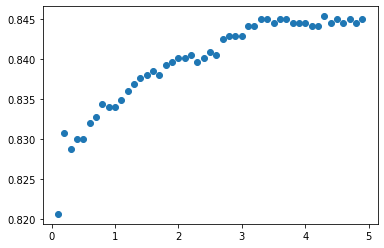

In [112]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], y, test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])


# Create the list of alphas: alphas
alphas = np.arange(0.1, 5, .1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(count_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(count_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
scores = np.empty(0)
for alpha in alphas:
    # print('Alpha: ', alpha)
    # print('Score: ', train_and_predict(alpha))
    scores = np.append(scores, train_and_predict(alpha))
   
plt.scatter(alphas, scores)
plt.show()
 

In [110]:

nb_classifier = MultinomialNB(alpha=1.4)

nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
print(score)

metrics.confusion_matrix(y_test, pred, labels=[0,1])

0.8505654281098546


array([[1087,  165],
       [ 237,  987]])

# TfidfVectorizer plus Naive Bayes classifier

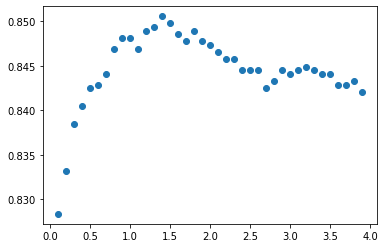

In [108]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)


# Create the list of alphas: alphas
alphas = np.arange(0.1, 4, .1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
scores = np.empty(0)
for alpha in alphas:
    # print('Alpha: ', alpha)
    # print('Score: ', train_and_predict(alpha))
    scores = np.append(scores, train_and_predict(alpha))
   
plt.scatter(alphas, scores)
plt.show()
 


In [109]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB(alpha=1.4)

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1])
print(cm)



0.8505654281098546
[[1125  127]
 [ 243  981]]


We can map the important vector weights back to actual words using some simple inspection techniques.

In [113]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


0 [(-12.399606113287975, '00s'), (-12.399606113287975, '08'), (-12.399606113287975, '100b'), (-12.399606113287975, '100mph'), (-12.399606113287975, '100th'), (-12.399606113287975, '102'), (-12.399606113287975, '105'), (-12.399606113287975, '1050'), (-12.399606113287975, '106'), (-12.399606113287975, '10mil'), (-12.399606113287975, '10s'), (-12.399606113287975, '111'), (-12.399606113287975, '114'), (-12.399606113287975, '11m'), (-12.399606113287975, '120'), (-12.399606113287975, '1201'), (-12.399606113287975, '1202'), (-12.399606113287975, '12383499143743701'), (-12.399606113287975, '12a'), (-12.399606113287975, '12m')]
1 [(-6.146601817356299, 'character'), (-6.143856071534607, 'seen'), (-6.138387094271962, 'movies'), (-6.119477832857804, 'films'), (-6.114140216769319, 'think'), (-6.038550396974713, 'life'), (-6.010564630920834, 'way'), (-5.976359149754455, 'best'), (-5.962540413046858, 'love'), (-5.887648537011865, 'people'), (-5.745453593104755, 'really'), (-5.619359583186674, 'great'